In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fin.csv")
df.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
0,T0001,2024-08-02,C2205,Headphones,-5.0,$420.21,pay pal,NaN
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.34202525395585,creditcard,Pending
2,T0003,2025-02-30,C2919,Tablet,-4.0,810.9930123946459,credit card,completed
3,T0004,2020-08-17,C3009,Tab,-7.0,868.6083413217348,PayPal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,-10.0,-763.1224490039416,PayPal,completed


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      94982 non-null   object 
 1   Transaction_Date    95120 non-null   object 
 2   Customer_ID         95122 non-null   object 
 3   Product_Name        100000 non-null  object 
 4   Quantity            94981 non-null   float64
 5   Price               66503 non-null   object 
 6   Payment_Method      100000 non-null  object 
 7   Transaction_Status  83321 non-null   object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [113]:
df.describe()

,Quantity
count,94981.000000
mean,183.883914
std,299.292365
min,-10.000000
25%,-3.000000
50%,6.000000
75%,327.000000
max,1000.000000


In [114]:
df['return '] = df['Quantity'] < 0
df['Quantity'] = df['Quantity'].abs()

In [115]:
df.isnull().sum()

Transaction_ID         5018
Transaction_Date       4880
Customer_ID            4878
Product_Name              0
Quantity               5019
Price                 33497
Payment_Method            0
Transaction_Status    16679
return                    0
dtype: int64

convert negitive values to positive

In [116]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

convert price into normal format

In [117]:
df['Price'] = df['Price'].replace('[$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [118]:
df.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,return
0,T0001,2024-08-02,C2205,Headphones,5.0,420.210000,pay pal,NaN,True
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.342025,creditcard,Pending,False
2,T0003,2025-02-30,C2919,Tablet,4.0,810.993012,credit card,completed,True
3,T0004,2020-08-17,C3009,Tab,7.0,868.608341,PayPal,Pending,True
4,T0005,2025-02-30,C3488,Coffee Machine,10.0,-763.122449,PayPal,completed,True


In [119]:
df['preturn '] = df['Price'] < 0
df['Price'] = df['Price'].abs()

In [120]:
df.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,return,preturn
0,T0001,2024-08-02,C2205,Headphones,5.0,420.210000,pay pal,NaN,True,False
1,T0002,2020-02-10,C3156,Coffee,469.0,445.342025,creditcard,Pending,False,True
2,T0003,2025-02-30,C2919,Tablet,4.0,810.993012,credit card,completed,True,False
3,T0004,2020-08-17,C3009,Tab,7.0,868.608341,PayPal,Pending,True,False
4,T0005,2025-02-30,C3488,Coffee Machine,10.0,763.122449,PayPal,completed,True,True


In [121]:
# replace blank transaction_Status with unkown

In [122]:
df['Transaction_Status'] = df['Transaction_Status'].fillna('unkown')

remove null Transaction_ID and  Customer_ID

In [123]:
df.dropna(subset=['Transaction_ID','Customer_ID'],inplace=True)

Convert to date and handle invalid dates

In [124]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'],errors='coerce')

In [125]:
df.dropna(subset=['Transaction_Date'],inplace=True)

In [126]:
df['Price'] = df['Price'].fillna( df['Price'].mean())

In [127]:
df.isnull().sum()

Transaction_ID        0
Transaction_Date      0
Customer_ID           0
Product_Name          0
Quantity              0
Price                 0
Payment_Method        0
Transaction_Status    0
return                0
preturn               0
dtype: int64

all numeric columns

In [128]:
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['Quantity', 'Price'], dtype='object')

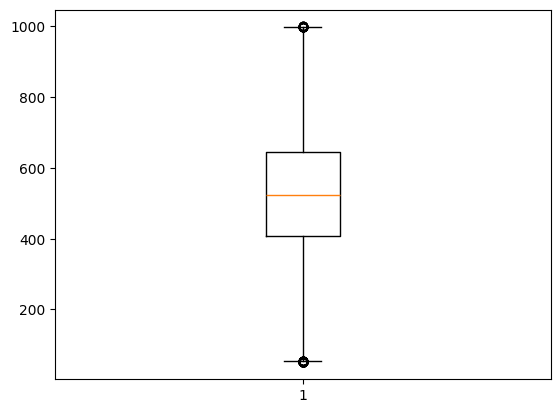

In [129]:
plt.boxplot(df['Price'])
plt.show()

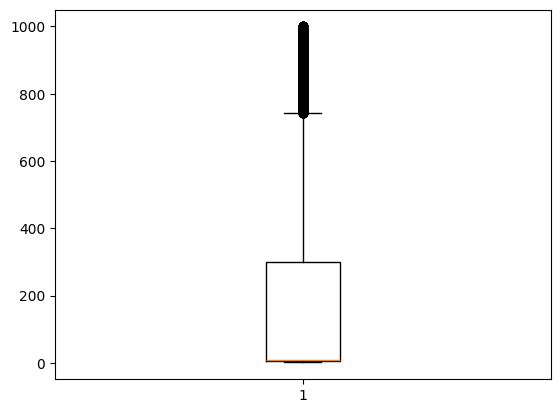

In [130]:
plt.boxplot(df['Quantity'])
plt.show()

find outliers

In [131]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outliers = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("iqr is :",iqr)

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print("lower_bound:",lower_bound)
    print("upper_bound:",upper_bound)

    outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]

outliers


iqr is : 295.0
lower_bound: 53.931388320326334
upper_bound: 998.2531126472286
iqr is : 236.08043108172558
lower_bound: 53.931388320326334
upper_bound: 998.2531126472286


{'Quantity': 2643, 'Price': 106}

In [132]:
df['year'] = df['Transaction_Date'].dt.year

In [133]:
df['month'] = df['Transaction_Date'].dt.month

In [134]:
df.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status,return,preturn,year,month
0,T0001,2024-08-02,C2205,Headphones,5.0,420.210000,pay pal,unkown,True,False,2024,8
1,T0002,2020-02-10,C3156,Coffee,469.0,445.342025,creditcard,Pending,False,True,2020,2
3,T0004,2020-08-17,C3009,Tab,7.0,868.608341,PayPal,Pending,True,False,2020,8
5,T0006,2021-10-26,C4241,Smartphone,598.0,524.306662,PayPal,Completed,False,False,2021,10
12,T0013,2020-03-18,C1692,Smartphone,564.0,524.306662,Cash,Completed,False,False,2020,3


In [145]:
monthly_Price = df.groupby('month')['Price'].sum()
monthly_Price

month
1     1.521261e+06
2     1.184255e+06
3     1.224107e+06
4     1.176347e+06
5     1.284024e+06
6     1.260839e+06
7     1.240075e+06
8     1.214340e+06
9     1.256647e+06
10    1.210028e+06
11    1.179470e+06
12    1.285199e+06
Name: Price, dtype: float64

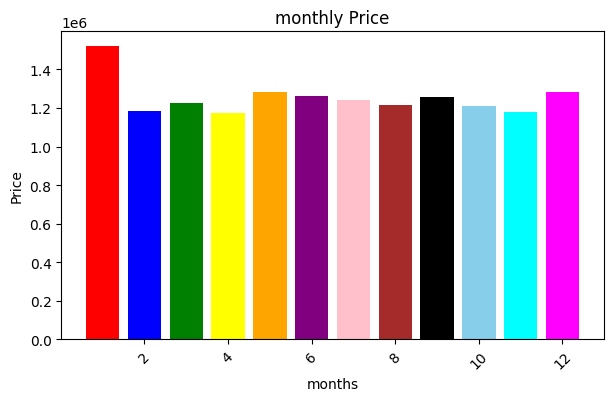

In [151]:
plt.figure(figsize=(7,4))
plt.bar(monthly_Price.index, monthly_Price.values,color = ["red","blue","green","yellow","orange","purple","pink","brown","black","skyblue","cyan","magenta"]
)
plt.xticks(rotation=45)
plt.title("monthly Price")
plt.xlabel("months")
plt.ylabel("Price")
plt.show()

In [148]:
yearly_Price = df.groupby('year')['Price'].sum()
yearly_Price

year
2020    2.898466e+06
2021    2.923029e+06
2022    3.001390e+06
2023    2.960317e+06
2024    2.968897e+06
2025    2.844920e+05
Name: Price, dtype: float64

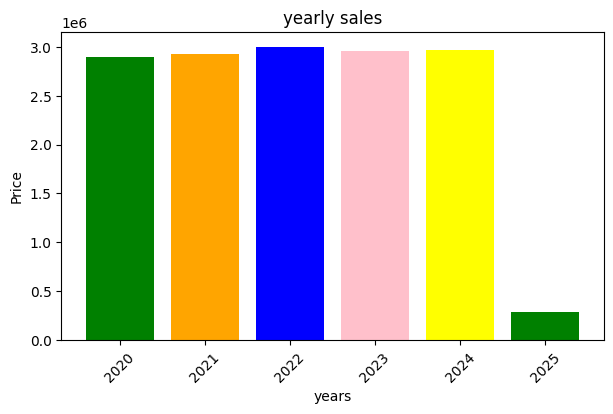

In [149]:
plt.figure(figsize=(7,4))
plt.bar(yearly_Price.index, yearly_Price.values,color=['green','orange','blue','pink','yellow'])
plt.xticks(rotation=45)
plt.title("yearly sales")
plt.xlabel("years")
plt.ylabel("Price")
plt.show()

In [152]:
pro_pri = df.groupby('Product_Name')['Price'].sum()

In [153]:
pro_pri

Product_Name
C                 2.189120e+04
Co                1.482934e+04
Cof               2.046482e+04
Coff              1.604008e+04
Coffe             2.257057e+04
Coffee            1.518244e+04
Coffee            2.229700e+04
Coffee M          1.725360e+04
Coffee Ma         2.317915e+04
Coffee Mac        1.895713e+04
Coffee Mach       2.254880e+04
Coffee Machi      2.392223e+04
Coffee Machin     1.862211e+04
Coffee Machine    2.742392e+06
H                 3.717984e+04
He                3.529587e+04
Hea               2.980116e+04
Head              3.132224e+04
Headp             3.113308e+04
Headph            2.701712e+04
Headpho           2.788725e+04
Headphon          3.171037e+04
Headphone         3.476397e+04
Headphones        2.672960e+06
L                 4.732670e+04
La                4.945859e+04
Lap               4.648268e+04
Lapt              5.712014e+04
Lapto             4.483176e+04
Laptop            2.773506e+06
S                 3.461421e+04
Sm                2.898568

map the product name 

In [154]:
#found unique product names 
df['Product_Name'].unique()

array(['Headphones', 'Coffee ', 'Tab', 'Smartphone', 'Coffee Machine',
       'Tablet', 'Cof', 'Laptop', 'Headp', 'Smart', 'La', 'C', 'Hea',
       'Head', 'Lapt', 'Lapto', 'Table', 'Smar', 'Coffee Ma', 'Headphone',
       'Smartph', 'S', 'Headph', 'Coffee Mach', 'L', 'Coffee Mac', 'T',
       'Co', 'Tabl', 'Smartphon', 'Coffee Machin', 'Sm', 'Headphon',
       'Headpho', 'Smartp', 'Ta', 'Lap', 'Coffe', 'He', 'Sma', 'Coff',
       'H', 'Coffee M', 'Coffee', 'Smartpho', 'Coffee Machi'],
      dtype=object)

In [163]:
df['Product_Name'] = df['Product_Name'].str.strip()

In [166]:
def map_product(name):
    first_char = name.strip().lower()[0]

    if first_char == 'h':
        return 'Headphones'
    elif first_char == 'l':
        return 'Laptop'
    elif first_char == 'c':
        return 'Coffee'
    elif first_char == 's':
        return 'smartphone'
    elif first_char == 't':
        return 'tablet'
    else:
        return name

df['Product_Name'] = df['Product_Name'].apply(map_product)


In [167]:
 df['Product_Name'].unique()

array(['Headphones', 'Coffee', 'tablet', 'smartphone', 'Laptop'],
      dtype=object)

In [168]:
pro_price = df.groupby('Product_Name')['Price'].sum()
pro_price

Product_Name
Coffee        3.000150e+06
Headphones    2.959071e+06
Laptop        3.018726e+06
smartphone    3.017958e+06
tablet        3.040685e+06
Name: Price, dtype: float64

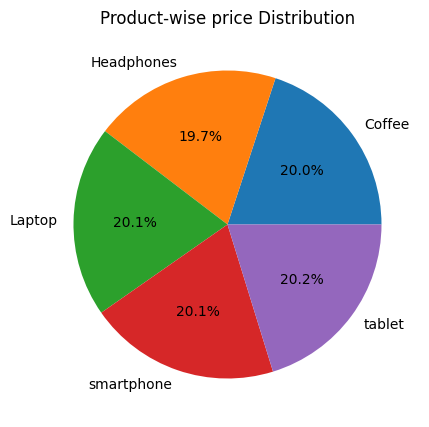

In [172]:
plt.figure(figsize=(5,5))
plt.pie(pro_price.values, labels=pro_price.index, autopct="%1.1f%%")
plt.title("Product-wise price Distribution")
plt.show()

In [173]:
method_price = df.groupby('Payment_Method')['Price'].sum()
method_price

Payment_Method
Cash           2.075059e+06
Credit Card    2.158696e+06
PayPal         2.119135e+06
PayPal         2.156699e+06
credit card    2.168150e+06
creditcard     2.205850e+06
pay pal        2.153002e+06
Name: Price, dtype: float64

In [176]:
df['Payment_Method'] = df['Payment_Method'].replace({
    'pay pal': 'PayPal',
    'paypal': 'PayPal',
    'PayPal': 'PayPal',

    'credit card': 'Credit Card',
    'creditcard': 'Credit Card',
    'Credit Card': 'Credit Card',

    'Cash': 'Cash'
})


In [179]:
method_price = df.groupby('Payment_Method')['Price'].sum()
method_price

Payment_Method
Cash           2.075059e+06
Credit Card    6.532696e+06
PayPal         4.272137e+06
PayPal         2.156699e+06
Name: Price, dtype: float64

In [181]:
df.to_csv('cleaned_finacial.csv',index=False)
print("done")

done
